In [845]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["scicore"].find({})))

# Scicore Comparison

This notebook is used to compare the tlsh and ssdeep hashes of the scicore dataset.
First I will compare the tlsh hashes and then the ssdeep hashes.



In [846]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash
4,4,OCaml,3eee2da2d713d971e6618b2f089d08e495c0cd8ec722f7...,13173764,{'ssdeep': '49152:lZBmaeQesTwicgVOMB4aJZhYw2UN...,sdhash hash,{'tlsh': 'T1F6D6E80EBB470662CD9809FE8CD5868FD6...,Machoc hash
...,...,...,...,...,...,...,...,...
1985,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash
1986,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash
1987,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash
1988,1988,ChimPipe,6cbb727cbfb1fb6335e4439ae7810e143e1bcc69b05ca0...,76135,{'ssdeep': '1536:Sw5j4LB3dUalDarob+tltydxgjmzB...,sdhash hash,{'tlsh': 'T101734B13B0959D7AC4478A301AC7823B99...,Machoc hash


In [847]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]

# Scicore Filtered

This is the filtered dataset with only families that have more than one entry. Since comparing the binary to itself can be done with SHA256, I will skip the families with only 1 entry.

In [848]:
scicore_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash
...,...,...,...,...,...,...,...,...
1983,1983,help2man,79bbee7e82e8cab0f238bc135ec79543a071371cddeb11...,19871,{'ssdeep': '384:sALj4CCJ8/eQyWvPX+ejZbCOL3npSe...,sdhash hash,{'tlsh': 'T13092F805EA2A8637B15301F77FDA54D09B...,Machoc hash
1984,1984,help2man,2a1400af01f63f02b64889eb203ed60eee4014a4d4ded2...,19896,{'ssdeep': '384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeL...,sdhash hash,{'tlsh': 'T1EC92F905EA2A8637B15301F77FDA54C09B...,Machoc hash
1985,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash
1986,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash


In [849]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = scicore_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
#print(f"Original DataFrame had {original_count} rows.")
#print(f"Filtered DataFrame has {filtered_count} rows.")
#print(f"Families removed (only had 1 entry): {removed_families}")


Example: Get the tlsh hash of the first entry (DIAMOND) and compare to all other entries.

In [850]:
from joblib import Parallel, delayed

def compare_sample(index, hasher):
    target_hash = scicore_concat.iloc[index][hasher][hasher]
    scores = []

    def compute_score(row):
        if hasher == "tlsh":
            return [row.name, row["family"], int(tlsh.diff(target_hash, row[hasher][hasher]))]
        elif hasher == "ssdeep":
            return [row.name, row["family"], int(ssdeep.compare(target_hash, row[hasher][hasher]))]

    scores = Parallel(n_jobs=-1)(delayed(compute_score)(row) for _, row in scicore_filtered.iterrows())

    return pd.DataFrame(scores, columns=["index", "family", "score"])


# Score

For TLSH, the score can go from 0 to as high as thousands. Depending on the threshold, we can filter out the entries that are not a candidate for a match, because of the False Positive rate and the True Positive rate. Reference: TLSH paper

In [851]:
perf

,index,family,score
3,3,DIAMOND,100


# Comparison

The idea now is to first see how the hashes are matched on their own families.
Example: Family DIAMOND hashes get only compared to itself to see how the score is distributed.

`family_scores` is for TLSH
`fam_sco_ssdeep` is for ssdeep

## TLSH

In [852]:
import itertools

family_scores = pd.DataFrame(columns=["family", "values", "mean", "median", "std", "amount"])
fam_sco_ssdeep = pd.DataFrame(columns=["family", "values", "mean", "median", "std", "amount"])
for k,fam in enumerate(scicore_filtered["family"].unique()):
    values = []
    s_values = []
    tmp = scicore_filtered[scicore_filtered["family"] == fam]["tlsh"].tolist()
    tmps = scicore_filtered[scicore_filtered["family"] == fam]["ssdeep"].tolist()
    combinations = list(itertools.combinations(tmp, 2))
    s_combinations = list(itertools.combinations(tmps, 2))
    for a, b in combinations:
        g = tlsh.diff(a["tlsh"],b["tlsh"])
        values.append(g)
        
    for a, b in s_combinations:
        f = ssdeep.compare(a["ssdeep"],b["ssdeep"])
        s_values.append(f)
    family_scores.loc[k] = [fam,values,np.mean(values), np.median(values), np.std(values),len(values)]
    fam_sco_ssdeep.loc[k] = [fam,s_values,np.mean(s_values), np.median(s_values), np.std(s_values),len(s_values)]

In [853]:
# Ignore the ones with only one result
family_scores.sort_values('amount')
family_scores_tlsh = family_scores[family_scores["amount"] > 3]
family_scores_tlsh

,family,values,mean,median,std,amount
0,DIAMOND,"[128, 260, 41, 320, 129, 271]",191.500000,194.5,98.415361,6
1,RStudio-Server,"[17, 4, 22, 164, 6, 23, 16, 7, 20, 45, 190, 22...",49.583333,22.0,61.029763,36
4,libgd,"[206, 169, 386, 136, 140, 471, 43, 460, 121, 447]",257.900000,187.5,155.789891,10
6,ant,"[13, 0, 99, 99, 99, 0, 13, 86, 86, 86, 13, 99,...",57.428571,86.0,44.618565,21
7,HTSlib,"[101, 125, 90, 58, 35, 30, 244, 60, 39, 79, 10...",125.321429,102.5,85.404940,28
...,...,...,...,...,...,...
327,ORCA,"[3, 3, 1, 472, 0, 3, 472, 3, 472, 472]",190.100000,3.0,230.172305,10
328,Qt5,"[23, 55, 37, 67, 49, 45]",46.000000,47.0,13.796135,6
331,Salmon,"[90, 75, 113, 47, 63, 81, 384, 57, 36, 74, 76,...",162.464286,85.5,136.939633,28
332,SeqPrep,"[151, 174, 163, 184, 153, 186, 46, 34, 51, 7, ...",76.904762,48.0,59.995162,21


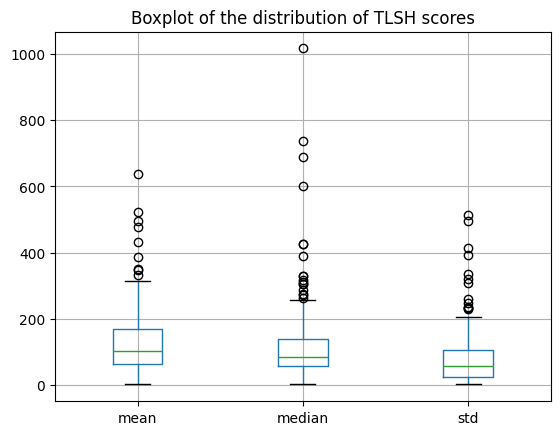

In [854]:
family_scores_tlsh[["mean","median","std"]].boxplot()
plt.title("Boxplot of the distribution of TLSH scores")
plt.show()

Comparing the scores of the families, the distribution is comparable to the result of the paper of TLSH. The prediction starts to be acceptable at around 80 and the false postive rate starts to be to high after 150 in the paper. Here we can see a similar trend.

# TLSH Prediction

In [855]:
def tlsh_predictor(threshold=0):
    predict = pd.DataFrame(index=range(family_scores_tlsh.shape[0]), columns=["score", "prediction", "true_value"])
    for i in range(0,scicore_filtered.shape[0],1):
        score = 1000
        k = 0
        for j in range(0,scicore_filtered.shape[0],1):
            if i == j:
                continue
            tmp = tlsh.diff(scicore_filtered.iloc[i]["tlsh"]["tlsh"],scicore_filtered.iloc[j]["tlsh"]["tlsh"])
            if score > tmp > threshold:
                score = tmp
                k = j
            
        #print(f"score: {score}, prediction: {scicore_filtered.iloc[i]['family']}, true value: {scicore_filtered.iloc[k]['family']}")
        predict.loc[i] = [score, scicore_filtered.iloc[i]["family"], scicore_filtered.iloc[k]["family"]]
    return predict


When not giving any threshold we receive a true positive rate of $81\%$ and a false positive rate of $19\%$. Compared to SSDEEP this is a great result.

# ROC Curve

To correctly get a ROC curve, 4 values are essential: TP, FP, TN, FN.

The problem currently is, that I do not have other samples which can have no match. All the samples have a match and therefore the TN rate is 0. Thus, I will add the same amount of malware samples and concatenate with the scicore db.

In [856]:
scicore_filtered["malware"] = False
scicore_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,malware
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,False
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,False
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,False
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,False
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1983,1983,help2man,79bbee7e82e8cab0f238bc135ec79543a071371cddeb11...,19871,{'ssdeep': '384:sALj4CCJ8/eQyWvPX+ejZbCOL3npSe...,sdhash hash,{'tlsh': 'T13092F805EA2A8637B15301F77FDA54D09B...,Machoc hash,False
1984,1984,help2man,2a1400af01f63f02b64889eb203ed60eee4014a4d4ded2...,19896,{'ssdeep': '384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeL...,sdhash hash,{'tlsh': 'T1EC92F905EA2A8637B15301F77FDA54C09B...,Machoc hash,False
1985,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,False
1986,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,False


In [857]:
size = scicore_filtered.shape[0] / 10
malware = pd.DataFrame(list(db["families"].aggregate([{"$sample": {"size": size}}])))
malware["malware"] = True
malware
scicore_concat = pd.concat([scicore_filtered, malware])

scicore_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,malware
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,False
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,False
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,False
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,False
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
161,656387bb3624482ac9d22043,GandCrab,448748449c0ca2753e5a777450eaa7de0e77192d9af93d...,71168,{'ssdeep': '1536:fZZZZZZZZZZZZpXzzzzzzzzzzzzV9...,sdhash hash,{'tlsh': 'T12F636A0EA2E1A193E1F357B9FA757E6544...,Machoc hash,True
162,6563924f3624482ac9d2b007,LokiPasswordStealer,ac5cee6485958007296885d85f5fdbafaaf417d51c6d50...,663552,{'ssdeep': '1536:vzvQSZpGS4/31A6mQgL2eYCGDwRcM...,sdhash hash,{'tlsh': 'T15FE42A82B2A5C030F7B74DB2BB73A5B785...,Machoc hash,True
163,65637d583624482ac9d1d820,Bashlite,dc820effe24106cdd600dbe895650c46893c17907e892b...,126909,{'ssdeep': '3072:MDM85GqkDjRnYy3+xdhQMXn3cEgr7...,sdhash hash,{'tlsh': 'T116C34B57D58AD7BFD0570AB901AFA27E05...,Machoc hash,True
164,65637d963624482ac9d1dd0b,Bashlite,ebbe4ff412995823217f8ebfc6029ab379de1fa876cf4d...,144085,{'ssdeep': '3072:hwWF8zi9QOvb0Peh3nDSnpCRaXKue...,sdhash hash,{'tlsh': 'T169E328377191C9BBC05362B41ADBA6619C...,Machoc hash,True


### TLSH Prediction Concat
To now correctly get the 4 essential values for the ROC curve, I will go through the concat dataset and compare to the scicore dataset. If a malware sample gets matched with a scicore one, then it is a FP. If no match gets found then it is a TN. If a scicore sample gets not matched to scicore dataset then it is a FN. If a scicore sample gets matched to a scicore sample then it is a TP.

In [959]:
"""
def tlsh_predictor_concat(threshold=1000):
    predict = pd.DataFrame(index=range(family_scores_tlsh.shape[0]), columns=["score","threshold" , "prediction", "true_value", "malware"])
    for i in range(0,scicore_concat.shape[0],1):
        score = 1000
        k = 0
        for j in range(0,scicore_filtered.shape[0],1):
            if i == j:
                continue
            tmp = tlsh.diff(scicore_concat.iloc[i]["tlsh"]["tlsh"],scicore_filtered.iloc[j]["tlsh"]["tlsh"])
            if score > tmp < threshold:
                score = tmp
                k = j
            
        #print(f"score: {score}, prediction: {scicore_filtered.iloc[i]['family']}, true value: {scicore_filtered.iloc[k]['family']}")
        predict.loc[i] = [score,threshold ,scicore_concat.iloc[i]["family"], scicore_concat.iloc[k]["family"],scicore_concat.iloc[i]["malware"]]
    return predict
def tlsh_roc():
    # Initialize DataFrame for ROC values
    roc = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])

    # Iterate over each threshold
    for threshold in range(150,50, -10):
        pred = tlsh_predictor_concat(threshold)
        TP = (pred["true_value"] == pred["prediction"]).sum()
        FP = (pred["true_value"] != pred["prediction"]).sum()
        FN = ((pred["score"] == 1000) & (pred["malware"] == False)).sum()
        TN = ((pred["score"] == 1000) & (pred["malware"] == True)).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        roc.loc[threshold] = [threshold, TPR, FPR]
    
    return roc
    
    """

In [860]:

from itertools import combinations

# Generate all binary combinations of the strings in the specified column
string_combinations = combinations(scicore_concat[['tlsh', 'family', 'malware']].iterrows(), 2)

# Apply tlsh.diff to each combination
results = []
for (idx1, row1), (idx2, row2) in string_combinations:
    diff_score = tlsh.diff(row1['tlsh']["tlsh"], row2['tlsh']["tlsh"])
    results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1['tlsh']['tlsh'], row2['tlsh']['tlsh'], diff_score))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])

results_df


,Family 1,Family 2,Malware 1,Malware 2,TLSH 1,TLSH 2,Diff Score
0,DIAMOND,DIAMOND,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T1FB457E47FAC358A8C097D538466FA1367A31BC9FC230...,128
1,DIAMOND,DIAMOND,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T1A3868E03E687A468C8A6C43813DB91B3ED717C799630...,260
2,DIAMOND,DIAMOND,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T112759F1B6BA208ADC892D53457E796F26C31B8B5C238...,41
3,DIAMOND,RStudio-Server,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T150918C52B0542BB67974A378DBB71467E320905B6001...,938
4,DIAMOND,RStudio-Server,False,False,T170858D1B66820CB9C492D53467E797F26830B8B5C238...,T1C4918A62B0542B767974A368DBB71466E320905B6001...,963
...,...,...,...,...,...,...,...
1673530,LokiPasswordStealer,Bashlite,True,True,T15FE42A82B2A5C030F7B74DB2BB73A5B7857E7C332D22...,T169E328377191C9BBC05362B41ADBA6619C21FCBF0771...,382
1673531,LokiPasswordStealer,GandCrab,True,True,T15FE42A82B2A5C030F7B74DB2BB73A5B7857E7C332D22...,T1ACA37D24B1D276B3F1E269BAE6B47B12445D7D042794...,464
1673532,Bashlite,Bashlite,True,True,T116C34B57D58AD7BFD0570AB901AFA27E0521FE3A462A...,T169E328377191C9BBC05362B41ADBA6619C21FCBF0771...,176
1673533,Bashlite,GandCrab,True,True,T116C34B57D58AD7BFD0570AB901AFA27E0521FE3A462A...,T1ACA37D24B1D276B3F1E269BAE6B47B12445D7D042794...,244


In [968]:
p = results_df.loc[results_df.groupby("TLSH 1")["Diff Score"].idxmin()]

p = p[p["Malware 2"] != True]

(p["Family 1"] == p["Family 2"]).sum() / p.shape[0]

0.651543793320731

In [947]:
"""
all_hashes = scicore_concat["tlsh"].map(lambda x: x["tlsh"])

# drop all rows where 'Malware 2' is True

predict = pd.DataFrame(index=range(all_hashes.shape[0]), columns=["score", "threshold" , "prediction", "true_value", "malware", "trash"])
for fam in all_hashes:
    fam_df = results_df[results_df["TLSH 1"] == fam]
    result = results_df[results_df["TLSH 1"] == fam].sort_values("Diff Score")
    for th in range(0,310,10):
        result_th = result[result["Diff Score"] < th]
        if result_th.shape[0] == 0:
            predict.loc[fam] = [1000,th, "No Match", fam, result["Malware 1"].iloc[0], result["Malware 2"].iloc[0]]
            continue
        result_s = result_th.sort_values("Diff Score").iloc[0]
        score = result_s["Diff Score"]
        prediction = result_s["Family 2"]
        malware = result_s["Malware 1"]
        trash = result_s["Malware 2"]
        predict.loc[fam] = [score,th, prediction, fam, malware,trash]
        """
        
    

KeyboardInterrupt: 

In [924]:
scicore_concat["tlsh"].map(lambda x: x["tlsh"])

0      T170858D1B66820CB9C492D53467E797F26830B8B5C238...
1      T1FB457E47FAC358A8C097D538466FA1367A31BC9FC230...
2      T1A3868E03E687A468C8A6C43813DB91B3ED717C799630...
3      T112759F1B6BA208ADC892D53457E796F26C31B8B5C238...
5      T150918C52B0542BB67974A378DBB71467E320905B6001...
                             ...                        
161    T12F636A0EA2E1A193E1F357B9FA757E65446E3D203B28...
162    T15FE42A82B2A5C030F7B74DB2BB73A5B7857E7C332D22...
163    T116C34B57D58AD7BFD0570AB901AFA27E0521FE3A462A...
164    T169E328377191C9BBC05362B41ADBA6619C21FCBF0771...
165    T1ACA37D24B1D276B3F1E269BAE6B47B12445D7D042794...
Name: tlsh, Length: 1830, dtype: object

# SSDEEP

In [864]:
# Remove redundant comparisons comparing themselfs
c = fam_sco_ssdeep[fam_sco_ssdeep['amount'] > 3]
c[c["median"] > 0]
fam_sco_ssdeep

,family,values,mean,median,std,amount
0,DIAMOND,"[0, 0, 0, 0, 0, 0]",0.000000,0.0,0.000000,6
1,RStudio-Server,"[97, 93, 93, 85, 94, 94, 97, 93, 93, 93, 85, 9...",92.527778,93.0,4.065342,36
2,Infernal,"[0, 0, 0]",0.000000,0.0,0.000000,3
3,FragPipe,[82],82.000000,82.0,0.000000,1
4,libgd,"[0, 71, 0, 0, 69, 0, 61, 0, 75, 0]",27.600000,0.0,33.956443,10
...,...,...,...,...,...,...
330,prodigal,"[0, 0, 0]",0.000000,0.0,0.000000,3
331,Salmon,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,0.0,0.000000,28
332,SeqPrep,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,0.0,0.000000,21
333,Qhull,[0],0.000000,0.0,0.000000,1


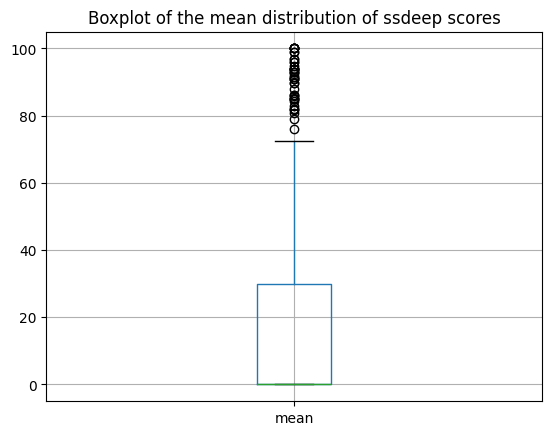

In [865]:
fam_sco_ssdeep.boxplot("mean")
plt.title("Boxplot of the mean distribution of ssdeep scores")
plt.show()

Interestingly, the ssdeep scores are much worse compared to the TLSH scores. The mean lies at around 0, which indicates no match and is therefore definitely not a good fuzzy hasher for this dataset.

## SSDEEP Prediction

First I will define a function that will predict the family of a sample based on the score of the comparison. The score is the maximum score of the comparison of the sample to all other samples. If the score is 0, there is no match and the prediction is "No Match". If the score is higher than 0, the prediction is the family with the highest score, based on the threshold. Second, I will define a function that will calculate the ROC curve based on the predictions on the given thresholds.

In [866]:
def predictor(threshhold=0, hasher="ssdeep"):

    predict = pd.DataFrame(index=range(scicore_concat.shape[0]), columns=["score", "prediction", "true_value", "malware"])
    
    for i in range(scicore_concat.shape[0]):
        tmp = compare_sample(i, hasher)
        tmp.loc[i, "score"] = 0  # Set the score of the i-th sample to 0 because it is compared to itself
        max_score = tmp["score"].max()
        
        if max_score == 0 or max_score <= threshhold:
            #ic("No match")
            predict.loc[i] = [0, "No Match", scicore_concat.iloc[i]["family"], scicore_concat.iloc[i]["malware"]]
        else:
            max_score_idx = tmp["score"].idxmax()
            prediction = tmp.loc[max_score_idx, "family"]
            true_value = scicore_concat.iloc[i]["family"]
            predict.loc[i] = [max_score, prediction, true_value, scicore_concat.iloc[i]["malware"]]
    
    return predict

In [867]:
def roc(predi):
    # Initialize DataFrame for ROC values
    roc = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])

    # Iterate over each threshold
    for threshold in range(10, 100, 10):
   
        pred = predi[pred["score"] > threshold]
        
        TP = (pred["true_value"] == pred["prediction"]).sum()
        FP = (pred["true_value"] != pred["prediction"]).sum()
        FN = ((pred["prediction"] == "No Match") & (pred["malware"] == False)).sum()
        TN = ((pred["prediction"] == "No Match") & (pred["malware"] == True)).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        roc.loc[threshold] = [threshold, TPR, FPR]
        ic(threshold, TPR, FPR)
    return roc


In [868]:
predo = predictor()

KeyboardInterrupt: 

In [ ]:
roci = roc(predo)
roci

In [ ]:
predo

The table represents the rates in % for each threshold. We can clearly see that the false positive rate is way to high and min maxing the threshold will not help. The ssdeep hasher is not a good candidate for this dataset, as the max true positive rate lies at $8.6\%$ and the false positive rate at $91.4\%$.

In [ ]:
# Plot the ROC curve in range 0.1 to 1.0
roci.plot(x="false_positive_rate", y="true_positive_rate", xlim=(roci["false_positive_rate"].min(), roci["false_positive_rate"].max()), ylim=(roci["true_positive_rate"].min(), roci["true_positive_rate"].max()), title="Kinda a ROC Curve", legend=False)
plt.show()

# TLSH Prediction